In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import time
import os

from datasets.mnist import MNIST

from models.cae_model import CAE
from models.conv_model import CNN

from train import train_ae, train_cnn

from cem import ContrastiveExplanationMethod

In [2]:
dataset = MNIST(batch_size=64)
# dataset = FashionMNIST()

# Training the classifier

In [3]:
cnn = CNN(device="cpu")

train_cnn(cnn, dataset, iterations=20, lr=0.01, save_fn='mnist-cnn', device="cpu", load_path="models/saved_models/mnist-cnn.h5")

In [4]:
images, _ = dataset.get_batch()

output = cnn(images)

images = images.numpy()
output = output.detach().numpy()


D:\david\Coding\uva-fact-ai\models\conv_model.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = nn.functional.softmax(out)


# Training the autoencoder

This section trains the autoencoder which will be used as regularizer for the data space which the perturbations are found in.

In [5]:
# Train or load autoencoder
cae = CAE(device="cpu")

train_ae(cae, dataset, iterations=10, save_fn="mnist-cae", device="cpu", load_path="models/saved_models/mnist-cae-no-rs.h5")

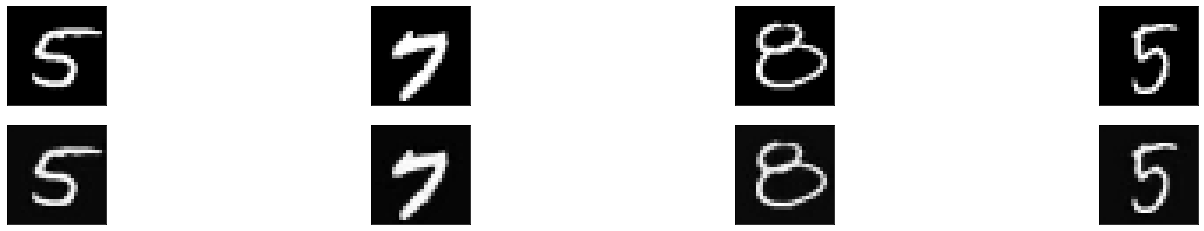

In [6]:
# obtain one batch of test images
images, _ = dataset.get_batch()

#images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = cae(images + .5)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
# output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Contrastive Explanation Method

In [32]:
kappa = 1
gamma = 0
beta = 1.
lr = 0.1
CEM = ContrastiveExplanationMethod(cnn, cae, iterations=1000, n_searches=4, kappa=kappa, gamma=gamma, beta=beta, learning_rate=lr)

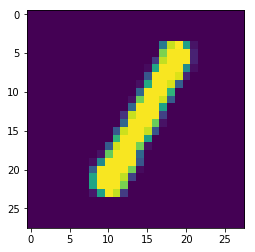

In [33]:
# obtain one sample
image, _ = dataset.get_sample()

plt.imshow(image.squeeze())

In [34]:
# find pertinent negatives
CEM.fista(image, mode="PN")

search:0 iteration:0 lr:0.10 c value:10.00 loss: 99.08 delta sum:0.00 optimum:False y grad:-0.040
search:0 iteration:20 lr:0.10 c value:10.00 loss: 385.69 delta sum:-307.22 optimum:False y grad:-157.302
search:0 iteration:40 lr:0.10 c value:10.00 loss: 385.69 delta sum:-307.22 optimum:False y grad:-157.302
search:0 iteration:60 lr:0.10 c value:10.00 loss: 385.69 delta sum:-307.22 optimum:False y grad:-157.302
search:0 iteration:80 lr:0.10 c value:10.00 loss: 385.69 delta sum:-307.22 optimum:False y grad:-157.302
search:0 iteration:100 lr:0.09 c value:10.00 loss: 385.69 delta sum:-307.22 optimum:False y grad:-157.302
search:0 iteration:120 lr:0.09 c value:10.00 loss: 390.65 delta sum:-307.72 optimum:False y grad:-148.455
search:0 iteration:140 lr:0.09 c value:10.00 loss: 390.65 delta sum:-307.72 optimum:False y grad:-148.455
search:0 iteration:160 lr:0.09 c value:10.00 loss: 388.75 delta sum:-307.61 optimum:False y grad:-168.125
search:0 iteration:180 lr:0.09 c value:10.00 loss: 389.72 

search:1 iteration:520 lr:0.07 c value:100.00 loss: 2694.07 delta sum:-310.22 optimum:True y grad:4473.211
search:1 iteration:540 lr:0.07 c value:100.00 loss: 2694.07 delta sum:-310.22 optimum:True y grad:4473.211
search:1 iteration:560 lr:0.07 c value:100.00 loss: 2694.07 delta sum:-310.22 optimum:True y grad:4473.211
search:1 iteration:580 lr:0.06 c value:100.00 loss: 2694.07 delta sum:-310.22 optimum:True y grad:4473.211
search:1 iteration:600 lr:0.06 c value:100.00 loss: 2694.07 delta sum:-310.22 optimum:True y grad:4473.211
search:1 iteration:620 lr:0.06 c value:100.00 loss: 2694.07 delta sum:-310.22 optimum:True y grad:4473.211
search:1 iteration:640 lr:0.06 c value:100.00 loss: 2694.07 delta sum:-310.22 optimum:True y grad:4473.211
search:1 iteration:660 lr:0.06 c value:100.00 loss: 2694.07 delta sum:-310.22 optimum:True y grad:4473.211
search:1 iteration:680 lr:0.06 c value:100.00 loss: 2694.07 delta sum:-310.22 optimum:True y grad:4473.211
search:1 iteration:700 lr:0.05 c valu

search:3 iteration:60 lr:0.10 c value:25.07 loss: 815.32 delta sum:-310.22 optimum:True y grad:656.788
search:3 iteration:80 lr:0.10 c value:25.07 loss: 815.32 delta sum:-310.22 optimum:True y grad:656.788
search:3 iteration:100 lr:0.09 c value:25.07 loss: 220.33 delta sum:-292.43 optimum:True y grad:281.757
search:3 iteration:120 lr:0.09 c value:25.07 loss: 434.69 delta sum:-292.31 optimum:True y grad:313.456
search:3 iteration:140 lr:0.09 c value:25.07 loss: 415.85 delta sum:-288.22 optimum:True y grad:245.123
search:3 iteration:160 lr:0.09 c value:25.07 loss: 418.73 delta sum:-288.49 optimum:True y grad:244.608
search:3 iteration:180 lr:0.09 c value:25.07 loss: 418.87 delta sum:-288.50 optimum:True y grad:244.806
search:3 iteration:200 lr:0.09 c value:25.07 loss: 418.82 delta sum:-288.51 optimum:True y grad:244.836
search:3 iteration:220 lr:0.09 c value:25.07 loss: 419.46 delta sum:-288.55 optimum:True y grad:245.397
search:3 iteration:240 lr:0.09 c value:25.07 loss: 431.47 delta su

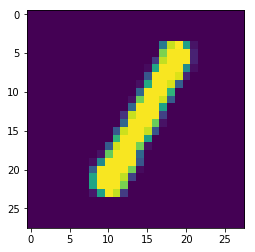

In [35]:
plt.imshow(image.squeeze())

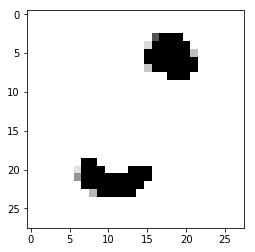

In [36]:
# perturbation
plt.imshow(image.squeeze()- CEM.best_delta.view(28,28), cmap="gray")

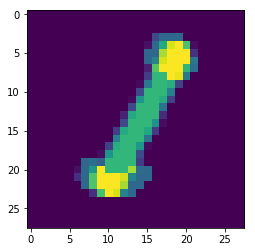

In [37]:
# original image with perturbation
plt.imshow(CEM.best_delta.view(28,28))

In [38]:
# classification before
before = np.argmax(cnn(image.squeeze(-1)).detach()).item()
before

1

In [39]:
# classification after
after = np.argmax(cnn(CEM.best_delta.view(1,28,28)).detach()).item()
after

2

In [40]:
# classification of delta
class_delta = np.argmax(cnn(image.squeeze(-1) - CEM.best_delta.view(1,28,28)).detach()).item()
class_delta

7

In [42]:
dirname = "saved_perturbations/kappa-{}-gamma-{}-beta-{}-lr-{}".format(kappa, gamma, beta, lr)
os.makedirs(dirname, exist_ok=True)
fname_orig = dirname + "/{}-cb-{}-ca-{}-orig.png".format(int(time.time()), before, after)
fname_pert = dirname + "/{}-before-{}-after-{}-pert.png".format(int(time.time()), before, after)
fname_combined = dirname + "/{}-before-{}-after-{}-pn.png".format(int(time.time()), before, after)
fname_combined_pp = dirname + "/{}-before-{}-after-{}-pp.png".format(int(time.time()), before, after)
plt.imsave(fname_orig, image.squeeze(), cmap="gray")
plt.imsave(fname_pert, CEM.best_delta.view(28,28) - image.squeeze(), cmap="gray")
plt.imsave(fname_combined, CEM.best_delta.view(28,28), cmap="gray")
plt.imsave(fname_combined_pp, image.squeeze() - CEM.best_delta.view(28,28))

In [ ]:
print(CEM.best_loss)

In [ ]:
print(CEM.best_pert_loss)

In [ ]:
print(image)